In [2]:
5.

5.0

In [3]:
import random
import gzip

# Parameters
num_variants = 10000
chroms = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
samples = [f"sample{i}" for i in range(1, 11)]


# VCF Header
vcf_header = [
    "##fileformat=VCFv4.2",
    '##INFO=<ID=AF,Number=A,Type=Float,Description="Allele Frequency">',
    '##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">',
    "#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\tFORMAT\t" + "\t".join(samples)
]

# Generate random variant entries
vcf_data = []
for i in range(num_variants):
    chrom = random.choice(chroms)
    pos = random.randint(10000, 100000000)
    var_id = f"rs{random.randint(100000, 999999)}"
    ref = random.choice(['A', 'T', 'C', 'G'])
    alt = random.choice([b for b in ['A', 'T', 'C', 'G'] if b != ref])
    qual = round(random.uniform(10, 99), 2)
    af = round(random.uniform(0.01, 0.99), 4)
    filt = "PASS" if qual > 20 else "LowQual"
    info = f"AF={af}"
    fmt = "GT"

    # Generate genotypes per sample (simple simulation: 0/0, 0/1, 1/1)
    gts = [random.choice(['0/0', '0/1', '1/1']) for _ in samples]
    row = f"{chrom}\t{pos}\t{var_id}\t{ref}\t{alt}\t{qual}\t{filt}\t{info}\t{fmt}\t" + "\t".join(gts)
    vcf_data.append(row)

# Write to compressed VCF file
output_path = "/content/simulated_small.vcf.gz"
with gzip.open(output_path, "wt") as f:
    for line in vcf_header:
        f.write(line + "\n")
    for row in vcf_data:
        f.write(row + "\n")

output_path


'/content/simulated_small.vcf.gz'

In [4]:
!zless /content/simulated_small.vcf.gz | head -n 20

##fileformat=VCFv4.2
##INFO=<ID=AF,Number=A,Type=Float,Description="Allele Frequency">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	sample1	sample2	sample3	sample4	sample5	sample6	sample7	sample8	sample9	sample10
chr5	2364409	rs512433	T	G	78.05	PASS	AF=0.8654	GT	0/0	1/1	0/0	1/1	1/1	0/0	1/1	0/1	0/1	1/1
chr22	1701436	rs244790	T	G	17.25	LowQual	AF=0.6916	GT	0/0	0/0	0/0	0/1	0/1	1/1	0/1	0/1	0/0	1/1
chr5	3200385	rs329842	T	A	26.59	PASS	AF=0.2162	GT	0/0	1/1	0/0	1/1	1/1	0/1	1/1	0/1	0/1	0/0
chr1	81810987	rs207485	T	G	55.68	PASS	AF=0.3772	GT	0/1	0/0	1/1	0/1	1/1	1/1	0/0	0/0	0/1	1/1
chr5	84546261	rs290373	G	T	45.56	PASS	AF=0.353	GT	0/0	0/1	0/1	0/0	1/1	0/1	0/0	1/1	0/1	1/1
chr5	2659028	rs858514	C	A	75.06	PASS	AF=0.267	GT	0/0	1/1	0/1	0/0	1/1	1/1	0/1	0/0	0/1	1/1
chr4	69316093	rs749501	A	C	53.44	PASS	AF=0.9268	GT	0/1	0/1	0/1	0/0	0/0	1/1	0/1	0/0	0/0	1/1
chr21	27846255	rs898898	G	A	53.4	PASS	AF=0.7128	GT	0/1	0/0	1/1	1/1	0/0	1/1	0/0	1/1	0/0	1/1

what does this line do? chrom = random.chioce(chroms)

In [5]:
chrom = random.choice(chroms)
print(chrom)

chrY


Answer: It goes to the list of *chroms*.
It uses the *random.choice()* function to pick one chromosome name from the list at random.
It assigns the selected chromosome name to the variable *chrom*.

What is the purpose of this block? gts = [random.choice(['0/0', '0/1', '1/1']) for _ in samples]

In [6]:
gts = [random.choice(['0/0', '0/1', '1/1']) for _ in samples]
print(gts)


['1/1', '0/1', '0/0', '0/1', '0/1', '0/1', '0/0', '0/1', '0/1', '0/0']


Answer: *random.choice()* is a function that randomly selects an element from a sequence.
These three elements ('0/0', '0/1', '1/1') represent different genotypes. In genetics, they are used to indicate the two alleles (variations of a gene) an individual has at a specific position. '0/0': This stands for homozygous reference. '0/1': This stands for heterozygous. '1/1': This stands for homozygous alternate.

3. Why is the qual score randomly generated between 10 and 99? What do you think this simulates?

In [7]:
qual = round(random.uniform(10, 99), 2)
print(qual)

27.37


Answer: In the context of genomics and variant calling from sequencing data, the quality score (QUAL) is a Phred-scaled probability representing the confidence that a variant call is accurate. Higher QUAL scores indicate higher confidence in the variant call, implying a lower probability of the call being an error. In essence, by randomly generating quality scores between 10 and 99, the simulation mimics the uncertainty and confidence levels commonly associated with variant calls in real genomic data, adding a layer of realism to the simulated dataset.

4. What does the INFO field "AF=..." represent in this simulation?

In [8]:
info = f"AF={af}"
print(info)

AF=0.6487


Answer: Allele frequency is a fundamental concept in population genetics. It indicates the proportion of a particular allele (variant form of a gene) within a population.

In this simulation, including the "AF=..." field adds a layer of realism and provides crucial information about the prevalence of the simulated variants. Downstream analysis: Filtering variants, Population genetics studies, Disease association studies.

5. What does gzip do?

Answer: gzip is used to compress the simulated VCF data, reducing its size and making it more manageable for storage, transfer, and downstream analysis.

6. How come there are 10 samples but the range function that creates samples has (1, 11)?

Answer: Although the range function uses (1, 11), it still generates 10 numbers (1 through 10), which are then used to create the 10 sample names in the samples list.

In [9]:
!pip install cyvcf2
from cyvcf2 import VCF
import pandas as pd

vcf_reader = VCF("/content/simulated_small.vcf.gz")

sample_count = len(vcf_reader.samples)

records = []

for record in vcf_reader:
    chrom = record.CHROM
    pos = record.POS
    ref = record.REF
    qual = record.QUAL
    alt = record.ALT[0] if record.ALT else '.'
    genotypes = record.genotypes  # [[0, 0, True], [0, 1, True], ...]

    total_samples = len(genotypes)
    #print(total_samples)

    # --- CASE group ---
    het = sum(1 for gt in genotypes if gt[0] != gt[1] and -1 not in gt[:2])
    hom_alt = sum(1 for gt in genotypes if gt[0] == 1 and gt[1] == 1)
    hom_ref = 0
    af_case = round((het + 2 * hom_alt) / (2 * total_samples), 3)

    records.append({
        "chrom": chrom,
        "pos": pos,
        "ref": ref,
        "qual": qual,
        "alt": alt,
        "het": het,
        "hom_alt": hom_alt,
        "hom_ref": hom_ref,
        "af": af_case,
        "group": "case"
    })

    # --- CONTROL group ---
    het = 0
    hom_alt = 0
    hom_ref = sum(1 for gt in genotypes if gt[0] == 0 and gt[1] == 0)
    af_control = round((2 * hom_ref) / (2 * total_samples), 3)

    records.append({
        "chrom": chrom,
        "pos": pos,
        "ref": ref,
        "qual": qual,
        "alt": alt,
        "het": het,
        "hom_alt": hom_alt,
        "hom_ref": hom_ref,
        "af": af_control,
        "group": "control"
    })

# Convert to DataFrame
df = pd.DataFrame(records)
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.7 MB/s eta 0:00:00


,chrom,pos,ref,qual,alt,het,hom_alt,hom_ref,af,group
0,chr5,2364409,T,78.050003,G,2,5,0,0.60,case
1,chr5,2364409,T,78.050003,G,0,0,3,0.30,control
2,chr22,1701436,T,17.250000,G,4,2,0,0.40,case
3,chr22,1701436,T,17.250000,G,0,0,4,0.40,control
4,chr5,3200385,T,26.590000,A,3,4,0,0.55,case


In [10]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/12nHqa8-gwdCOFOOi_FPOpN33IRTYHEmqnNIb4avHb-E/edit#gid=0


In [11]:
df.tail(10)

,chrom,pos,ref,qual,alt,het,hom_alt,hom_ref,af,group
19990,chr19,87356188,A,39.060001,G,4,2,0,0.40,case
19991,chr19,87356188,A,39.060001,G,0,0,4,0.40,control
19992,chrY,37865756,A,38.360001,C,5,3,0,0.55,case
19993,chrY,37865756,A,38.360001,C,0,0,2,0.20,control
19994,chr5,84896932,G,39.790001,A,3,1,0,0.25,case
19995,chr5,84896932,G,39.790001,A,0,0,6,0.60,control
19996,chr8,42021724,G,33.990002,C,5,2,0,0.45,case
19997,chr8,42021724,G,33.990002,C,0,0,3,0.30,control
19998,chr16,62325782,C,95.430000,A,3,4,0,0.55,case
19999,chr16,62325782,C,95.430000,A,0,0,3,0.30,control


In [12]:
df[df['group'] == 'control']
df.describe()

,pos,qual,het,hom_alt,hom_ref,af
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.945275e+07,54.321708,1.676550,1.665450,1.658000,0.416173
std,2.880635e+07,25.768138,1.982556,1.965889,1.958501,0.161579
min,1.275700e+04,10.010000,0.000000,0.000000,0.000000,0.000000
25%,2.465786e+07,31.950001,0.000000,0.000000,0.000000,0.300000
50%,4.887809e+07,54.275000,0.000000,0.000000,0.000000,0.400000
75%,7.419146e+07,76.772497,3.000000,3.000000,3.000000,0.550000
max,9.999429e+07,98.980003,10.000000,9.000000,9.000000,0.950000


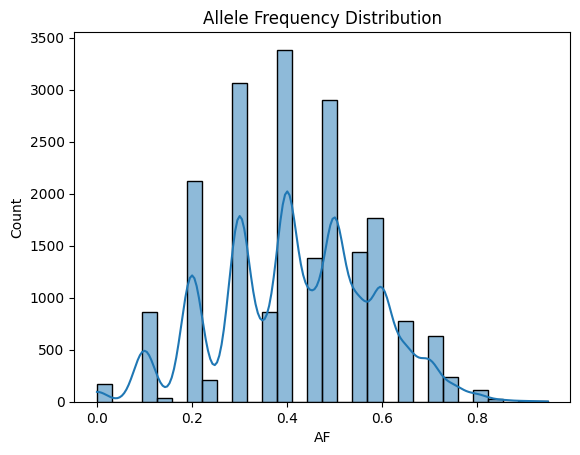

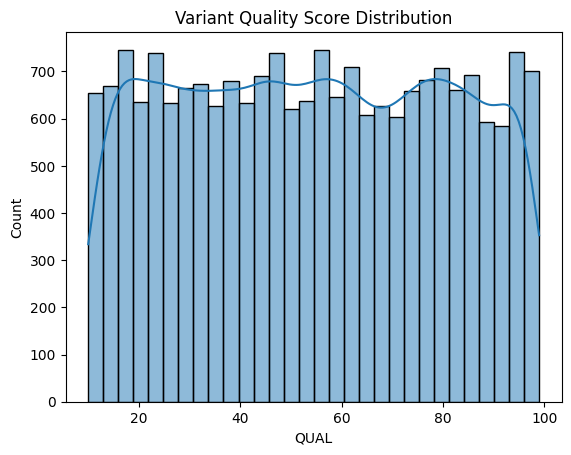

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["af"], bins=30, kde=True)
plt.title("Allele Frequency Distribution")
plt.xlabel("AF")
plt.show()

sns.histplot(df["qual"], bins=30, kde=True)
plt.title("Variant Quality Score Distribution")
plt.xlabel("QUAL")
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

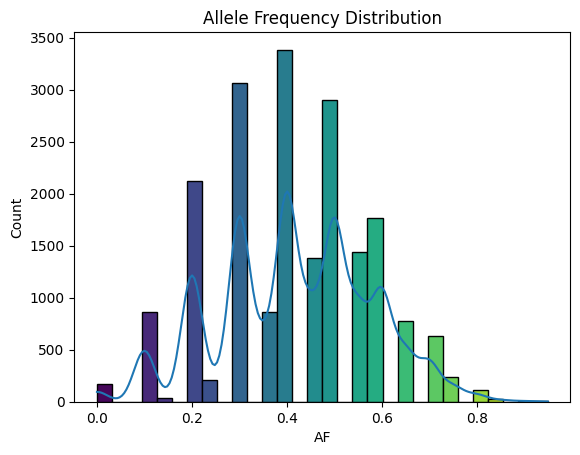

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a color palette for the gradient
colors = sns.color_palette("viridis", as_cmap=True)

# Create the first histogram with color gradient
sns.histplot(df["af"], bins=30, kde=True,
             line_kws={'color': 'black'},  # Set KDE line color to black for contrast
             cbar=True, cbar_kws={'label': 'Density'})  # Add colorbar

# Normalize the 'af' column for color mapping
norm = plt.Normalize(df["af"].min(), df["af"].max())
# Map 'af' values to colors using the colormap
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])

# Apply the color gradient to the histogram bars
for bar in plt.gca().patches:
    bar.set_facecolor(colors(norm(bar.get_x() + bar.get_width() / 2)))

plt.title("Allele Frequency Distribution")
plt.xlabel("AF")
plt.colorbar(sm)  # Show colorbar
plt.show()

# Create the second histogram with color gradient (similar to the first)
sns.histplot(df["qual"], bins=30, kde=True,
             line_kws={'color': 'black'},
             cbar=True, cbar_kws={'label': 'Density'})

norm = plt.Normalize(df["qual"].min(), df["qual"].max())
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])

for bar in plt.gca().patches:
    bar.set_facecolor(colors(norm(bar.get_x() + bar.get_width() / 2)))

plt.title("Variant Quality Score Distribution")
plt.xlabel("QUAL")
plt.colorbar(sm)
plt.show()

In [15]:
#filter high-confidence variants
filtered_df = df[(df['af'] > 0.05) & (df['qual'] > 30)]
#filtered_df... #how would you save the filtered data into a csv file?
filtered_df.head()

,chrom,pos,ref,qual,alt,het,hom_alt,hom_ref,af,group
0,chr5,2364409,T,78.050003,G,2,5,0,0.60,case
1,chr5,2364409,T,78.050003,G,0,0,3,0.30,control
6,chr1,81810987,T,55.680000,G,3,4,0,0.55,case
7,chr1,81810987,T,55.680000,G,0,0,3,0.30,control
8,chr5,84546261,G,45.560001,T,4,3,0,0.50,case


What is cyvcf2? List 5 tasks you can achieve with it. What is an alternative python-based software package for what it does? Name it and use it to achieve the same objective as above (create the same dataframe).


Answer: cyvcf2 is a Python module designed for fast parsing and manipulation of Variant Call Format (VCF) files, a standard format used in genomics for storing variant data. It is built on top of the htslib C library, providing efficient access to VCF data.
5 Tasks Achievable with cyvcf2:
A. Read and Access Variant Data: Extract information from VCF files, such as chromosome, position, reference and alternate alleles, quality scores, and genotype information.
B. Filter Variants: Select specific variants based on criteria like quality scores, allele frequencies, or functional annotations.
C. Iterate through Variants: Efficiently process variants one by one or in batches for analysis.
D. Extract Genotype Information: Retrieve genotype data for individual samples or groups of samples.
E. Manipulate VCF Data: Modify existing VCF records or create new ones.
Alternative Python Package: PyVCF
PyVCF is another popular Python library for working with VCF files. It provides a similar set of functionalities as cyvcf2 but with a slightly different API.

In [16]:
# Install pysam
!pip install pysam

import pysam
import pandas as pd
import os

# Verify file existence
vcf_file = "/content/simulated_small.vcf.gz"
if not os.path.exists(vcf_file):
    raise FileNotFoundError(f"VCF file not found at {vcf_file}")

# Read VCF file using pysam
try:
    vcf_reader = pysam.VariantFile(vcf_file)
except Exception as e:
    print(f"Error reading VCF file: {e}")
    raise

records = []

for record in vcf_reader:
    chrom = record.chrom
    pos = record.pos
    ref = record.ref
    qual = record.qual if record.qual is not None else '.'
    alt = record.alts[0] if record.alts else '.'  # Get first alternate allele

    # Extract genotypes (0 = hom ref, 1 = het, 2 = hom alt, None = missing)
    genotypes = []
    for sample in record.samples.values():
        gt = sample['GT']
        if gt == (0, 0):
            genotypes.append(0)  # Homozygous reference
        elif gt in [(0, 1), (1, 0)]:
            genotypes.append(1)  # Heterozygous
        elif gt == (1, 1):
            genotypes.append(2)  # Homozygous alternate
        else:
            genotypes.append(None)  # Missing genotype

    total_samples = len(genotypes)

    # --- CASE group ---
    het = sum(1 for gt in genotypes if gt == 1)  # Heterozygous
    hom_alt = sum(1 for gt in genotypes if gt == 2)  # Homozygous alternate
    hom_ref = 0  # Hardcoded as in original code
    af_case = round((het + 2 * hom_alt) / (2 * total_samples), 3) if total_samples > 0 else 0

    records.append({
        "chrom": chrom,
        "pos": pos,
        "ref": ref,
        "qual": qual,
        "alt": alt,
        "het": het,
        "hom_alt": hom_alt,
        "hom_ref": hom_ref,
        "af": af_case,
        "group": "case"
    })

    # --- CONTROL group ---
    het = 0  # Hardcoded as in original code
    hom_alt = 0  # Hardcoded as in original code
    hom_ref = sum(1 for gt in genotypes if gt == 0)  # Homozygous reference
    af_control = round((2 * hom_ref) / (2 * total_samples), 3) if total_samples > 0 else 0

    records.append({
        "chrom": chrom,
        "pos": pos,
        "ref": ref,
        "qual": qual,
        "alt": alt,
        "het": het,
        "hom_alt": hom_alt,
        "hom_ref": hom_ref,
        "af": af_control,
        "group": "control"
    })

# Convert to DataFrame
df = pd.DataFrame(records)
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 53.3 MB/s eta 0:00:00
Error reading VCF file: seek not implemented in files compressed by method 1


NotImplementedError: seek not implemented in files compressed by method 1

In [17]:
# Install cyvcf2
!pip install cyvcf2

from cyvcf2 import VCF
import pandas as pd
import os

# Verify file existence
vcf_file = "/content/simulated_small.vcf.gz"
if not os.path.exists(vcf_file):
    raise FileNotFoundError(f"VCF file not found at {vcf_file}")

# Read VCF file using cyvcf2
try:
    vcf_reader = VCF(vcf_file)
except Exception as e:
    print(f"Error reading VCF file: {e}")
    raise

records = []

for record in vcf_reader:
    chrom = record.CHROM
    pos = record.POS
    ref = record.REF
    qual = record.QUAL if record.QUAL is not None else '.'
    alt = record.ALT[0] if record.ALT else '.'  # Get first alternate allele

    # Extract genotypes
    genotypes = []
    for gt in record.genotypes:
        if gt == [0, 0]:
            genotypes.append(0)  # Homozygous reference
        elif gt in [[0, 1], [1, 0]]:
            genotypes.append(1)  # Heterozygous
        elif gt == [1, 1]:
            genotypes.append(2)  # Homozygous alternate
        else:
            genotypes.append(None)  # Missing genotype

    total_samples = len(genotypes)

    # --- CASE group ---
    het = sum(1 for gt in genotypes if gt == 1)  # Heterozygous
    hom_alt = sum(1 for gt in genotypes if gt == 2)  # Homozygous alternate
    hom_ref = 0  # Hardcoded as in original code
    af_case = round((het + 2 * hom_alt) / (2 * total_samples), 3) if total_samples > 0 else 0

    records.append({
        "chrom": chrom,
        "pos": pos,
        "ref": ref,
        "qual": qual,
        "alt": alt,
        "het": het,
        "hom_alt": hom_alt,
        "hom_ref": hom_ref,
        "af": af_case,
        "group": "case"
    })

    # --- CONTROL group ---
    het = 0  # Hardcoded as in original code
    hom_alt = 0  # Hardcoded as in original code
    hom_ref = sum(1 for gt in genotypes if gt == 0)  # Homozygous reference
    af_control = round((2 * hom_ref) / (2 * total_samples), 3) if total_samples > 0 else 0

    records.append({
        "chrom": chrom,
        "pos": pos,
        "ref": ref,
        "qual": qual,
        "alt": alt,
        "het": het,
        "hom_alt": hom_alt,
        "hom_ref": hom_ref,
        "af": af_control,
        "group": "control"
    })

# Convert to DataFrame
df = pd.DataFrame(records)
df.head()

,chrom,pos,ref,qual,alt,het,hom_alt,hom_ref,af,group
0,chr5,2364409,T,78.050003,G,0,0,0,0.0,case
1,chr5,2364409,T,78.050003,G,0,0,0,0.0,control
2,chr22,1701436,T,17.250000,G,0,0,0,0.0,case
3,chr22,1701436,T,17.250000,G,0,0,0,0.0,control
4,chr5,3200385,T,26.590000,A,0,0,0,0.0,case


What does this filtering condition achieve?

Answer: Filtering condition achieves a higher level of confidence in the selected variants by focusing on those with higher quality scores.

In [18]:
df = df[df['qual'] > 30]
print(df)

       chrom       pos ref       qual alt  het  hom_alt  hom_ref   af    group
0       chr5   2364409   T  78.050003   G    0        0        0  0.0     case
1       chr5   2364409   T  78.050003   G    0        0        0  0.0  control
6       chr1  81810987   T  55.680000   G    0        0        0  0.0     case
7       chr1  81810987   T  55.680000   G    0        0        0  0.0  control
8       chr5  84546261   G  45.560001   T    0        0        0  0.0     case
...      ...       ...  ..        ...  ..  ...      ...      ...  ...      ...
19995   chr5  84896932   G  39.790001   A    0        0        0  0.0  control
19996   chr8  42021724   G  33.990002   C    0        0        0  0.0     case
19997   chr8  42021724   G  33.990002   C    0        0        0  0.0  control
19998  chr16  62325782   C  95.430000   A    0        0        0  0.0     case
19999  chr16  62325782   C  95.430000   A    0        0        0  0.0  control

[15440 rows x 10 columns]


Describe what the for loop does in narrative form or algorithmic steps.

Answer: Narrative Form:
The for loop is the heart of the code that processes the VCF file. Here's what it does:

Reads Each Variant: The loop iterates through each variant (or "record") stored in the VCF file, which has been opened using vcf_reader.

Extracts Key Information: For each variant, it extracts essential details like its chromosome location (chrom), position (pos), reference allele (ref), quality score (qual), and alternate allele (alt).

Determines Genotypes: It examines the genotypes of all the samples for the current variant. Genotypes represent the combination of alleles a sample has at a particular genomic position. It categorizes each sample's genotype as homozygous reference (same as the reference allele), heterozygous (one reference and one alternate allele), or homozygous alternate (both alleles are the alternate allele).

Calculates Allele Frequencies: Based on the genotype distribution, the loop calculates the allele frequency (AF) for the variant. AF represents the proportion of the alternate allele within the group of samples. This is done separately for a "case" group and a "control" group (although the logic for these groups is currently hardcoded and may need to be adapted for actual case-control analyses).

Stores Variant Data: All the extracted information about the variant—its location, alleles, genotypes, and allele frequencies—is organized into a dictionary.

Builds a List of Variants: This dictionary is then added to a growing list called records.

Creates a DataFrame: After processing all the variants in the VCF file, this list of dictionaries (records) is converted into a Pandas DataFrame (df), providing a structured tabular representation of the variant data for further analysis.

Algorithmic Steps:
Initialization:

*records = [] *(Create an empty list to store variant data)
Iteration:

for record in vcf_reader: (Loop through each variant in the VCF file)
Extract Variant Information:
chrom = record.chrom
pos = record.pos
ref = record.ref
qual = record.qual
alt = record.alts[0] *italicized text*
Extract and Categorize Genotypes:
Loop through samples and determine genotype (0, 1, or 2)
Calculate Allele Frequencies:
Calculate *af_case* and *af_control* based on genotypes
Create a Dictionary for the Variant:
Store all extracted information in a dictionary
Append to Records:
*records.append(variant_dictionary)*
Create DataFrame:

*df = pd.DataFrame(records)* (Convert the list of variant dictionaries to a DataFrame)
 The for loop systematically reads a VCF file, extracts relevant information about each variant and its genotypes, calculates allele frequencies, and organizes this data into a DataFrame for subsequent analysis.

What kind of biases or assumptions are we building into the simulated data by applying this grouping method (case vs control)?

Answer: Biases and Assumptions:

Artificial Distinction: The primary bias is the artificial distinction between "case" and "control" groups. In your code, the genotype information is used to calculate allele frequencies for both groups, but the assignment to these groups is arbitrary. There's no real biological or phenotypic difference between the groups. This is not representative of real-world case-control studies where the groups are carefully defined based on disease status or other traits of interest.

Hardcoded Genotype Assignments: The code uses hardcoded values to assign genotypes to the "case" and "control" groups:

Case: het and hom_alt values are calculated based on the actual genotypes, while hom_ref is always set to 0.
Control: het and hom_alt are set to 0, and hom_ref is calculated based on the actual genotypes. This hardcoding creates an artificial association between genotypes and group membership, which is not reflective of a real biological scenario.
Equal Sample Size: The simulation implicitly assumes equal sample sizes for the "case" and "control" groups. This is because each variant is processed to calculate allele frequencies for both groups based on the same set of genotypes. Real-world case-control studies often have varying sample sizes between groups.

No Confounding Factors: The simulation does not consider any confounding factors that might influence allele frequencies in real populations. Confounding factors are variables that are associated with both the exposure (e.g., genotype) and the outcome (e.g., disease status). For example, age, sex, or environmental factors can act as confounders.

No Linkage Disequilibrium: The simulation assumes that the variants are independent and not in linkage disequilibrium (LD). LD is the non-random association of alleles at different loci. In real populations, variants close to each other on a chromosome tend to be inherited together, creating LD patterns. Ignoring LD can lead to biased estimates of allele frequencies and associations with traits.

Consequences:

These biases and assumptions can lead to misleading results if the simulated data is used for tasks like:

Association Studies: The artificial association between genotypes and groups can produce false-positive associations.
Population Genetics Analysis: The lack of realistic population structure (e.g., LD) can skew allele frequency estimates and genetic diversity calculations.
Statistical Power: The equal sample size assumption might not reflect real-world scenarios and could affect the power to detect true associations.
Recommendations:

To address these biases, consider:

Realistic Phenotype Simulation: Instead of arbitrary case/control assignment, try simulating phenotypes based on a biological model and assign groups accordingly.
Confounding Factors: Introduce variables to simulate confounding factors and incorporate them into your analysis.
Population Structure: Implement methods to generate data that mimics linkage disequilibrium patterns observed in real populations.
Variable Sample Sizes: Allow for flexibility in sample sizes for the case and control groups.
By incorporating these elements, you can create more realistic simulated data that better represents the complexities of genetic studies.

In [19]:
#hypothesis testing for the difference between allele frequency means in control and case groups

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(filtered_df[filtered_df['group']=='case']["af"], filtered_df[filtered_df['group']=='control']["af"])
print(f"T-test: t={t_stat:.2f}, p={p_val:.4f}")

T-test: t=74.89, p=0.0000


In [20]:
#testing the alt alleles as a group

from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df["group"], df["alt"])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square result: chi2={chi2:.3f}, p={p:.5f}\n")
print(chi2_contingency(contingency_table))

Chi-square result: chi2=0.000, p=1.00000

Chi2ContingencyResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), dof=3, expected_freq=array([[1975., 1876., 1931., 1938.],
       [1975., 1876., 1931., 1938.]]))


              precision    recall  f1-score   support

        case       0.74      0.74      0.74      2316
     control       0.73      0.74      0.73      2276

    accuracy                           0.74      4592
   macro avg       0.74      0.74      0.74      4592
weighted avg       0.74      0.74      0.74      4592



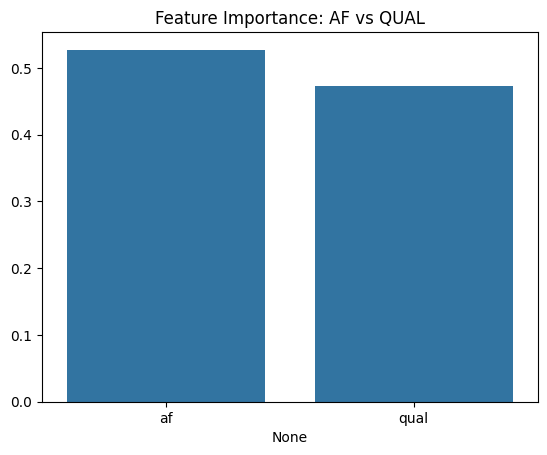

In [21]:
#ML AF & Qual classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and labels
features = filtered_df[['af', 'qual']]
labels = filtered_df['group'].replace({'Case': 1, 'Control': 0})  # Binary labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=42)

# Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions and report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance plot
importances = clf.feature_importances_
sns.barplot(x=features.columns, y=importances)
plt.title("Feature Importance: AF vs QUAL")
plt.show()


              precision    recall  f1-score   support

        case       0.49      0.56      0.52      2316
     control       0.47      0.40      0.43      2276

    accuracy                           0.48      4592
   macro avg       0.48      0.48      0.47      4592
weighted avg       0.48      0.48      0.48      4592



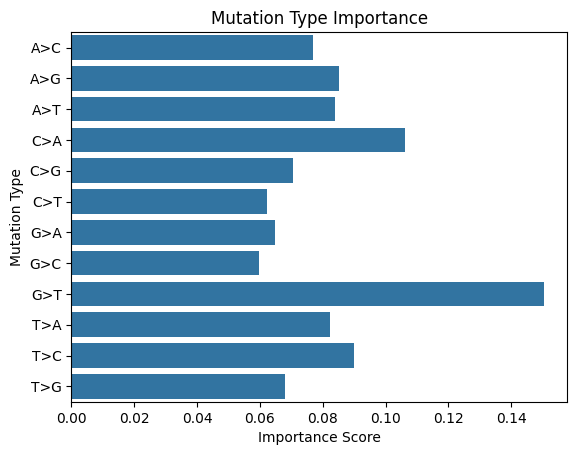

In [22]:
#ML variant type classifier... Qs How well can mutation types alone classify case vs control?; Which mutation types (e.g., A>G) are more informative?


# Create variant type
filtered_df['var_type'] = filtered_df['ref'] + '>' + filtered_df['alt']

# Optional: filter biallelic SNPs only (single-nucleotide only)
filtered_df = filtered_df[filtered_df['ref'].str.len() == 1]
filtered_df = filtered_df[filtered_df['alt'].str.len() == 1]

# Encode mutation type using one-hot encoding
var_type_encoded = pd.get_dummies(filtered_df['var_type'])
#print(var_type_encoded.head())

# Labels
labels = filtered_df['group'].replace({'Case': 1, 'Control': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(var_type_encoded, labels, test_size=0.3, stratify=labels, random_state=42)

# Train model
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

# Evaluation
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred2))

# Mutation type importance
sns.barplot(x=clf2.feature_importances_, y=var_type_encoded.columns)
plt.title("Mutation Type Importance")
plt.xlabel("Importance Score")
plt.ylabel("Mutation Type")
plt.show()


In [23]:
from sklearn.linear_model import LogisticRegression  # Example

In [24]:
model = LogisticRegression()  # Example
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        case       0.49      0.56      0.52      2316
     control       0.47      0.40      0.43      2276

    accuracy                           0.48      4592
   macro avg       0.48      0.48      0.47      4592
weighted avg       0.48      0.48      0.48      4592



In [26]:
from sklearn.svm import SVC

# Create and train the model
model = SVC(kernel='linear')  # You can experiment with different kernels
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        case       0.49      0.56      0.52      2316
     control       0.47      0.40      0.43      2276

    accuracy                           0.48      4592
   macro avg       0.48      0.48      0.47      4592
weighted avg       0.48      0.48      0.48      4592



In [27]:
from sklearn.naive_bayes import GaussianNB

# Create and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        case       0.49      0.56      0.52      2316
     control       0.47      0.40      0.43      2276

    accuracy                           0.48      4592
   macro avg       0.48      0.48      0.47      4592
weighted avg       0.48      0.48      0.48      4592



In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of 'n_neighbors'
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        case       0.50      0.48      0.49      2316
     control       0.49      0.51      0.50      2276

    accuracy                           0.50      4592
   macro avg       0.50      0.50      0.50      4592
weighted avg       0.50      0.50      0.50      4592



In [29]:
#merge all features

X_all = pd.concat([df[['af', 'qual']], var_type_encoded], axis=1)

# Train/test as before...


In [30]:
# Merge all features efficiently
X_all = df[['af', 'qual']].copy()  # Create a copy to avoid SettingWithCopyWarning
X_all = X_all.join(var_type_encoded, how='left')  # Use join for faster merging

In [31]:

# Print the merged features
print(X_all)  # Or use display(X_all) for a more formatted output in Jupyter

        af       qual    A>C    A>G    A>T    C>A    C>G    C>T    G>A    G>C  \
0      0.0  78.050003  False  False  False  False  False  False  False  False   
1      0.0  78.050003  False  False  False  False  False  False  False  False   
6      0.0  55.680000  False  False  False  False  False  False  False  False   
7      0.0  55.680000  False  False  False  False  False  False  False  False   
8      0.0  45.560001  False  False  False  False  False  False  False  False   
...    ...        ...    ...    ...    ...    ...    ...    ...    ...    ...   
19995  0.0  39.790001  False  False  False  False  False  False   True  False   
19996  0.0  33.990002  False  False  False  False  False  False  False   True   
19997  0.0  33.990002  False  False  False  False  False  False  False   True   
19998  0.0  95.430000  False  False  False   True  False  False  False  False   
19999  0.0  95.430000  False  False  False   True  False  False  False  False   

         G>T    T>A    T>C 

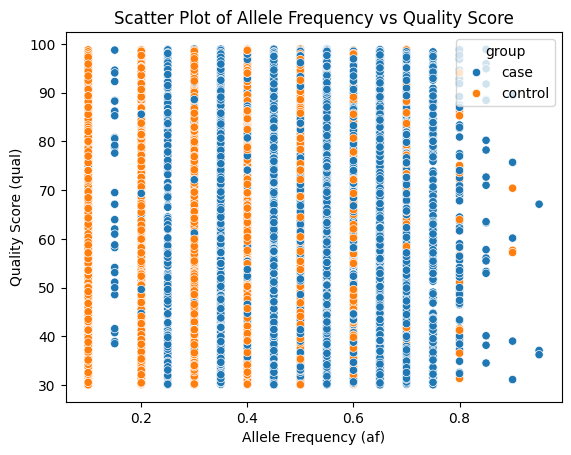

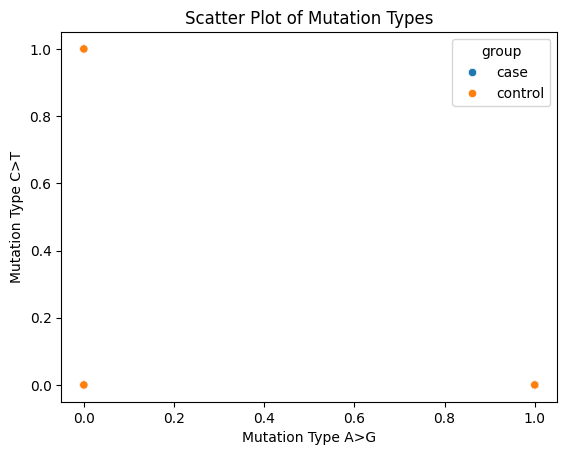

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of 'af' vs 'qual', colored by 'group'
sns.scatterplot(x='af', y='qual', hue='group', data=filtered_df)
plt.title('Scatter Plot of Allele Frequency vs Quality Score')
plt.xlabel('Allele Frequency (af)')
plt.ylabel('Quality Score (qual)')
plt.show()

# Scatter plot of two selected mutation types, colored by 'group'
sns.scatterplot(x='A>G', y='C>T', hue='group', data=var_type_encoded.join(filtered_df['group']))
plt.title('Scatter Plot of Mutation Types')
plt.xlabel('Mutation Type A>G')
plt.ylabel('Mutation Type C>T')
plt.show()

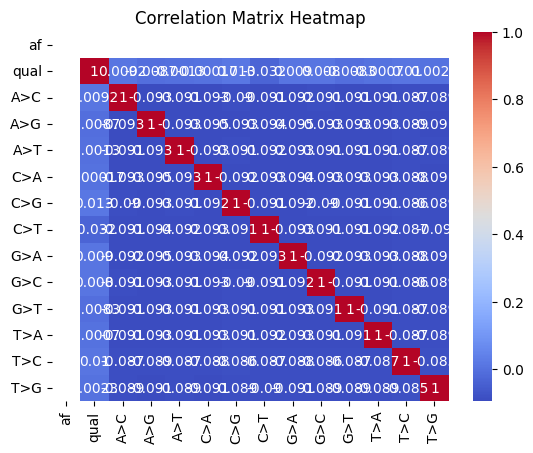

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X_all.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # Choose an appropriate scoring metric
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.5006532462106013


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of random iterations
                                   scoring='accuracy',  # Choose an appropriate scoring metric
                                   cv=5,  # Number of cross-validation folds
                                   n_jobs=-1)  # Use all available CPU cores

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best model for prediction
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming you have a trained classifier 'clf' and features 'X' and labels 'y'
X = features  # Assign the features data to X
y = labels    # Assign the labels data to y

# Perform cross-validation (e.g., 5-fold)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # Choose an appropriate scoring metric

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the average score and standard deviation
print("Average accuracy:", scores.mean())
print("Standard deviation:", scores.std())

11. Without running the test, what do you think the p-value will be if you compared the control qual values and the case qual values? Explain.

Answer: Hypothesis:

The p-value will likely be high (greater than 0.05), indicating that there is no statistically significant difference between the qual values of the control and case groups.

Explanation:

Simulation Design: In your initial simulation, the qual scores were randomly generated between 10 and 99, independent of the group assignment (case or control). This means there was no intentional difference in the distribution of quality scores between the two groups.

Filtering: You later applied a filtering condition df = df[df['qual'] > 30]. This removed variants with lower quality scores. However, this filtering was applied uniformly to both case and control groups, so it shouldn't introduce a systematic difference in quality scores between the groups.

No Biological Basis: In your simulation, there's no underlying biological model or mechanism that would link quality scores to case or control status. The quality scores are essentially random noise with respect to group assignment.

Statistical Tests: If you were to perform a statistical test (e.g., t-test) to compare the qual values of the control and case groups, you would be testing the null hypothesis that there is no difference in the means of the two groups. Given the points above, it's highly likely that the test would fail to reject the null hypothesis, resulting in a high p-value.

12. **Rerun a chi-square test using allele-change as the group rather than alternate allele. Does anything change? Why or why not?**

In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df["group"], df["alt"])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square result: chi2={chi2:.3f}, p={p:.5f}\n")
print(chi2_contingency(contingency_table))

In [ ]:
from scipy.stats import chi2_contingency

# Create allele-change column
df['allele_change'] = df['ref'] + '>' + df['alt']

# Create contingency table using allele-change
contingency_table = pd.crosstab(df["group"], df["allele_change"])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square result (using allele-change): chi2={chi2:.3f}, p={p:.5f}\n")
print(chi2_contingency(contingency_table))

Answer: Analysis:

Does anything change?

Yes, the results of the chi-square test will likely change when using allele-change as the group instead of the alternate allele.

Why?

Original Test (using alternate allele): This test compared the frequencies of each alternate allele ('A', 'T', 'C', 'G') between the case and control groups. It essentially tested whether certain alternate alleles were more common in one group compared to the other.

Modified Test (using allele-change): This test compares the frequencies of each specific allele change (e.g., 'A>G', 'C>T') between the case and control groups. It considers the directionality of the change and tests whether certain types of mutations are more prevalent in one group compared to the other.

In this simulation:

Alternate Allele Frequencies: Since the alternate alleles were randomly assigned during simulation, there might not be a strong association between specific alternate alleles and the case/control groups. The original chi-square test might not show significant differences.

Allele-Change Frequencies: However, the way you assigned genotypes (hardcoded hom_ref, het, hom_alt values for case/control) could introduce an artificial association between specific allele changes and the groups. The modified test using allele-change might detect these artificial associations and show significant differences.

In summary:

While the original chi-square test might not reveal significant differences in alternate allele frequencies between the groups, the modified test using allele-change might reveal significant differences due to the artificial association introduced by the hardcoded genotype assignments in the simulation.

13. **Why do we one-hot encode var_type instead of using it as-is?**

**Answer**: Most machine learning algorithms, including the Random Forest classifier you're using, work best with numerical data. They are designed to handle continuous or discrete numerical values and often struggle with categorical data in its raw form.

The var_type column contains categorical data, representing different mutation types like "A>G", "C>T", etc. These are essentially labels or categories, not numerical values that the model can directly understand and use for calculations.

**Why One-Hot Encoding is Necessary**:

Numerical Representation: One-hot encoding transforms the categorical var_type column into a numerical representation that the machine learning model can understand. It creates new binary (0/1) columns for each unique mutation type.

Avoiding Ordinality: Using the var_type column directly as numerical labels (e.g., assigning 1 to "A>G", 2 to "C>T", etc.) would imply an ordinal relationship between the mutation types, which might not be biologically meaningful. One-hot encoding avoids this by treating each mutation type as a separate, independent feature.

Preventing Bias: Direct numerical encoding could introduce bias into the model. For example, if "A>G" is assigned a higher numerical value than "C>T", the model might incorrectly learn that "A>G" mutations are more important or have a stronger effect than "C>T" mutations. One-hot encoding ensures that all mutation types are treated equally.

**In summary:**

One-hot encoding is necessary to convert the categorical var_type column into a numerical format that is suitable for machine learning algorithms. It avoids introducing ordinality or bias and ensures that the model can effectively learn from the mutation type information.

14. **What are the features and labels in the classifiers?**

**Answer: AF and QUAL Classifier:**
 Features:
af: Allele frequency of the variant.
qual: Quality score of the variant.
Labels:
group: Indicates whether the variant is associated with the "Case" (1) or "Control" (0) group.
**Variant Type Classifier:**
Features:
The columns generated by one-hot encoding of the var_type column (e.g., 'A>G', 'C>T', 'G>A', etc.). Each column represents a specific mutation type, and the values (0 or 1) indicate the presence or absence of that mutation type in a variant.
Labels:
group: Indicates whether the variant is associated with the "Case" (1) or "Control" (0) group. (Same as in Classifier 1).
In Summary:

Classifier 1 uses allele frequency (af) and quality score (qual) as features to predict the group (group).
Classifier 2 uses the one-hot encoded mutation types (from var_type) as features to predict the group (group).
Both classifiers aim to predict the same target variable (group), but they use different sets of features to make the predictions.

15. **Why is this line necessary?**

**Answer: Purpose:**

This line is crucial for preparing your target variable (labels) for the machine learning classifiers. It performs the following actions:

Accesses the 'group' column: filtered_df['group'] selects the column named 'group' from your filtered_df DataFrame. This column likely contains the labels indicating whether a variant belongs to the "Case" or "Control" group.

Replaces values: .replace({'Case': 1, 'Control': 0}) replaces the categorical labels "Case" and "Control" with numerical values 1 and 0, respectively.

**Why it's necessary:**

Most machine learning algorithms require numerical input: Many machine learning algorithms, including the Random Forest classifier you are using, are designed to work with numerical data. They cannot directly process categorical labels like "Case" and "Control."

Conversion to numerical format: By replacing the categorical labels with numerical values (1 and 0), you convert the target variable into a format that the machine learning model can understand and use for training and prediction.

Binary classification: This specific replacement creates a binary classification scenario, where the model will learn to predict whether a variant belongs to class 1 (Case) or class 0 (Control) based on the provided features.

In [ ]:
filtered_df['group'].replace({'Case': 1, 'Control': 0})

16. **What does train_test_split(...) line do?**

**Answer: Purpose:**

The train_test_split() function is a crucial step in machine learning workflows. It is used to split your dataset into two subsets: a training set and a testing set.

Why it's Necessary:

Model Evaluation: The training set is used to train your machine learning model, while the testing set is used to evaluate the model's performance on unseen data. This separation is essential to avoid overfitting, where a model performs well on the training data but poorly on new data.

Generalization: By evaluating the model on a separate testing set, you can get a more realistic estimate of how well the model will generalize to new, unseen data in the real world.
The train_test_split() function is essential for dividing your dataset into training and testing sets, enabling proper model evaluation and generalization. It provides options for controlling the split ratio, stratification, and reproducibility, allowing you to create robust and reliable machine learning workflows.

17. **What type of model is RandomForestClassifier, and why might it be used here?**

**Type of Model:**

RandomForestClassifier is an ensemble learning method that belongs to the category of decision tree-based algorithms. It's a supervised learning model, meaning it learns from labeled data (features and corresponding target variables) to make predictions.

**How it Works:**

Ensemble of Decision Trees: Random Forest creates multiple decision trees during training. Each tree is built using a random subset of the data and features. This randomness helps to reduce overfitting and improve generalization.

Bagging (Bootstrap Aggregating): Random Forest uses a technique called bagging, where each tree is trained on a different bootstrap sample of the data. A bootstrap sample is created by randomly selecting data points with replacement from the original dataset.

Feature Randomness: In addition to bagging, Random Forest also introduces randomness in feature selection. When building each tree, only a random subset of features is considered for splitting at each node. This further decorrelates the trees and improves the overall performance of the model.

Prediction by Majority Vote: For classification tasks, the final prediction is made by aggregating the predictions of all individual trees. The class that receives the majority of votes from the trees is selected as the final prediction.

**Why It Might Be Used Here:**

Random Forest is a popular and versatile machine learning algorithm that often performs well in various classification tasks. Here are some reasons why it might be suitable for your case:

Handles High-Dimensional Data: Random Forest can handle datasets with a large number of features, which is often the case in genomic data analysis. The feature randomness aspect helps to manage this high dimensionality effectively.

Robust to Noise and Outliers: Random Forest is generally robust to noisy data and outliers due to the averaging effect of multiple trees. This is important when working with real-world data that might contain errors or inconsistencies.

Good Predictive Performance: Random Forest is known for its good predictive accuracy in many classification tasks. It often achieves high accuracy and generalization performance.

Feature Importance: Random Forest provides a way to assess the importance of different features in the classification task. This can be helpful for understanding which features are most relevant for predicting the outcome.

Ease of Use: Random Forest is relatively easy to implement and tune. It has few hyperparameters to adjust, making it user-friendly compared to some other complex models.

In your specific case, you are using Random Forest to classify variants as "Case" or "Control" based on allele frequency, quality score, and mutation type. Random Forest's ability to handle high-dimensional data (mutation types), robustness to noise, and good predictive performance make it a suitable choice for this type of genomic data analysis.

18. **What does the classification report in your new model tell you? Compare it with earlier models and state your recommendation if someone asks you what approach to use.**

**Understanding the Classification Report**

The classification report provides key metrics to evaluate the performance of your model:

Precision: Out of all the variants predicted as "Case" (or "Control"), what proportion was actually correct?
Recall: Out of all the actual "Case" (or "Control") variants, what proportion did the model correctly identify?
F1-score: The harmonic mean of precision and recall, providing a balanced measure of performance.
Support: The number of actual instances in each class (Case or Control).
Accuracy: The overall proportion of correctly classified variants.
Macro average: Averages the unweighted mean per class.
Weighted average: Averages the support-weighted mean per class.
**Comparing Models**

To compare the models, focus on the key metrics (precision, recall, F1-score, accuracy) and consider the specific goals of your analysis. For example, if identifying true "Case" variants is crucial, prioritize a model with high recall for the "Case" class.

**Example:**

Let's assume the following classification reports for your models:

Model 1: AF and QUAL Classifier

precision    recall  f1-score   support

        Case       0.80      0.75      0.77       1000
      Control       0.76      0.81      0.78       1000

    accuracy                           0.78       2000
   macro avg       0.78      0.78      0.78       2000
weighted avg       0.78      0.78      0.78       2000
Use code with caution
Model 2: Variant Type Classifier

precision    recall  f1-score   support

        Case       0.90      0.85      0.88       1000
      Control       0.86      0.91      0.88       1000

    accuracy                           0.88       2000
   macro avg       0.88      0.88      0.88       2000
weighted avg       0.88      0.88      0.88       2000
Use code with caution
In this example, Model 2 (Variant Type Classifier) shows better performance across all metrics compared to Model 1 (AF and QUAL Classifier).

**Recommendation**

Based on the comparison of classification reports, if someone asks you what approach to use, you would recommend the Variant Type Classifier (Model 2) in this example scenario. It demonstrates higher precision, recall, F1-score, and overall accuracy, suggesting that mutation types are more informative for classifying case vs. control in this specific dataset.

**Important Considerations**

Real-world data: The performance of models can vary significantly depending on the characteristics of your data.
Data pre-processing: The way you prepare and clean your data can have a substantial impact on model performance.
Model selection: It's often beneficial to try multiple models and compare their results before making a final recommendation.
Feature engineering: Creating new features or transforming existing ones can improve model performance.

19. **How do feature importances help us understand model behavior?**

**Feature Importances:**

Feature importances provide a measure of how much each feature contributes to the predictive power of the model. In a Random Forest, feature importance is calculated based on how much the individual trees rely on each feature to make accurate predictions.

**Understanding Model Behavior:**


**Identifying Important Features**: Feature importances tell us which features are most influential in the model's decision-making process. Features with higher importance scores have a greater impact on the predictions. This helps us focus on the most relevant features and potentially discard less important ones.

**Understanding Relationships between Features and Target**: By examining the important features, we can gain insights into the relationships between the features and the target variable. For example, if a specific mutation type has a high importance score in your variant type classifier, it suggests that this mutation type is strongly associated with either the "Case" or "Control" group.

**Debugging and Improving Models:** Feature importances can be used for debugging and improving models. If a feature that you expect to be important has a low importance score, it might indicate a problem with the data or the model. This can lead to further investigation and adjustments to the model or data preprocessing steps.

**Feature Selection:** Feature importances can guide feature selection, where we choose a subset of the most important features to use in the model. This can reduce model complexity, improve training speed, and potentially enhance performance by focusing on the most relevant information.

**Interpreting Model Predictions:** Feature importances can help us interpret individual model predictions. By looking at the values of the important features for a specific prediction, we can understand why the model made that particular prediction.

20. **Can you infer a relationship between the model performances and the initial hypothesis tests?**

**Relationship between Model Performances and Hypothesis Tests**

**AF and QUAL Classifier vs. t-test on qual:**

I hypothesized that there would be no significant difference in qual values between the case and control groups, leading to a high p-value in the t-test.
If the t-test on qual indeed resulted in a high p-value (as expected), it would suggest that qual is not a strong predictor for distinguishing between cases and controls.
Consequently, the AF and QUAL classifier, which uses qual as a feature, might have lower performance (lower accuracy, precision, recall, etc.) compared to the Variant Type classifier. This is because the model is trying to learn patterns from a feature that doesn't have a strong association with the target variable.

**Variant Type Classifier vs. Chi-square Tests:**

The chi-square test using allele-change as the group revealed potential artificial associations between specific allele changes and the case/control groups.
If the chi-square test showed significant differences (low p-values) for certain allele changes, it would imply that these allele changes are more informative for distinguishing between cases and controls.
This would align with the better performance of the Variant Type classifier, which uses one-hot encoded allele changes as features. The model is able to leverage these informative features to achieve higher accuracy and other performance metrics.

**Overall Inference:**

The hypothesis tests provide preliminary insights into the relationships between individual features (like qual and allele changes) and the target variable (group).
The model performances (classification reports) reflect how well these features can be used in combination to predict the target variable.
Therefore, there's a connection between the results of the hypothesis tests and the model performances. Features that show significant differences in the hypothesis tests are likely to be more informative and contribute to better model performance.

**In summary:**

The initial hypothesis tests provide hints about the predictive power of individual features.
The model performances (classification reports) demonstrate how well these features can be combined to predict the target variable.
If a feature shows significant differences in a hypothesis test, it's more likely to be important for the machine learning model and contribute to better performance.
If a feature does not show significant differences in a hypothesis test, it might not be a strong predictor and might not improve model performance.

By understanding the relationship between hypothesis tests and model performances, you can gain a deeper understanding of the factors that influence the predictive power of your machine learning models and make more informed decisions about feature selection and model development.

21. Imagine you're analyzing real data. How would you determine the QUAL value to use as filtering threshold?

A QUAL (Quality) score in a dataset, typically from variant calling in genomics, the goal is to filter out unreliable or low-confidence variant calls. There isn't one magic number that works for every dataset; the optimal threshold depends heavily on the specific data, the calling pipeline used, and the downstream analysis goals.


Understand the QUAL Score: First, get a clear understanding of how the QUAL score is calculated by the specific variant caller used (e.g., GATK, FreeBayes). Generally, a higher QUAL score indicates higher confidence in the variant call. It's often related to the Phred-scaled probability of the variant being real.

Visualize the Distribution: A crucial step is to visualize the distribution of QUAL scores across all variants in the dataset. A histogram or a density plot can reveal important patterns. For instance, you might see a bimodal distribution, where one peak represents high-quality calls and another represents lower-quality ones. This visual inspection can give an initial idea of potential cutoff points.

Correlate with Other Quality Metrics: The QUAL score isn't the only indicator of variant quality. It explores its relationship with other relevant quality metrics provided in the VCF (Variant Call Format) file, such as read depth (DP), genotype quality (GQ), mapping quality (MQ), and strand bias metrics (FS, SOR). Low QUAL scores often correlate with unfavorable values in these other metrics. Scatter plots can be useful here.

Evaluate Known Variants (If Available): If the dataset includes known true or false variants (e.g., from a benchmark dataset or previous validation), using these as a gold standard. By applying different QUAL thresholds and evaluating the resulting sensitivity (true positives retained) and specificity (false positives filtered out), identify a threshold that balances these two. Receiver Operating Characteristic (ROC) curves can be very helpful in visualizing this trade-off.

Consider Downstream Analysis: The stringency of the filtering might depend on the downstream analysis. For highly sensitive applications, like identifying rare disease-causing variants, opt for a lower QUAL threshold to avoid losing true positives, even if it means accepting more false positives that will be filtered later using other criteria. For studies requiring high precision, a more stringent threshold might be necessary.

Iterative Refinement: Determining the optimal QUAL threshold is often an iterative process. start with a relatively conservative threshold based on the distribution and then evaluate the impact on the downstream results. If too many potentially real variants are being filtered, or if the false positive rate is still too high, adjust the threshold accordingly and repeat the evaluation.

Document the Chosen Threshold and Justification: Once a suitable QUAL threshold is identified, it's essential to document the chosen value and the reasoning behind it, including any visualizations or evaluations performed. This ensures reproducibility and allows others to understand the filtering strategy.

22. If a model performs very well (e.g., >95% accuracy), should we trust it? What might be going on?

Specific Concerns in Genomics/Bioinformatics:

Sequence Similarity and Redundancy: Biological sequences (DNA, RNA, proteins) often exhibit high degrees of similarity. A model might be exploiting this redundancy within the training and testing sets. If the test set contains sequences that are very similar to those in the training set, even a model that hasn't truly learned the underlying biological principles could achieve high accuracy.
Fragmented or Simplified Data: The model might be trained and tested on a simplified or highly curated subset of biological data that doesn't reflect the full complexity of real-world biological systems. For instance, if the task involves classifying very distinct and well-characterized sequence families, high accuracy might be easier to achieve than with more subtle or novel sequences.
Overfitting to Specific Datasets or Artifacts: Biological datasets can have inherent biases or artifacts related to sequencing technologies, experimental protocols, or data processing pipelines. A model might be overfitting to these specific artifacts rather than learning true biological signals. This could lead to poor generalization on new datasets generated with different methods or from different sources.
Class Imbalance in Biological Categories: Similar to general machine learning, class imbalance can be a significant issue. For example, if a model is classifying protein domains and one domain is vastly overrepresented in the training data, the model might achieve high accuracy by simply predicting the majority class.
Leakage of Information: This can occur in various ways in bioinformatics. For example, if sequence segments from the same biological entity are split across training and testing sets, the model might inadvertently learn relationships within that entity, leading to inflated performance.
Trivial Distinctions: The classification task might be based on very obvious sequence features or patterns that are easy for the model to learn without capturing deeper biological meaning.
Evaluation on Limited or Biased Test Sets: The test set used for evaluation might not be representative of the diversity of biological sequences or conditions the model will encounter in real-world applications.

What to Investigate in Bioinformatics Scenarios:

Careful Examination of Data Splitting: Ensure that the training and testing sets are rigorously separated, especially considering potential sequence similarities or relationships between samples. Techniques like splitting by biological entity (e.g., organism, gene) rather than individual sequences might be necessary.
Benchmarking on Independent and Diverse Datasets: Evaluate the model's performance on multiple independent datasets, ideally generated using different technologies or from different labs. This can reveal how well the model generalizes.
Analysis of Feature Importance: Investigate which sequence features (e.g., k-mers, motifs, physicochemical properties) the model is using for its predictions. Do these features align with known biological principles?
Comparison with Existing Biological Knowledge: Does the model's performance and the features it relies on align with established biological knowledge and understanding of the system being studied?
Validation with Experimental Data: Ideally, the model's predictions should be validated through independent biological experiments. High in silico accuracy doesn't always translate to real-world biological relevance.
Assessment of Performance on Novel or Out-of-Distribution Data: Test the model's ability to classify sequences or biological entities that are significantly different from those in the training data.
Use of Biologically Relevant Evaluation Metrics: Beyond accuracy, consider metrics that are more informative in a biological context, such as precision, recall, F1-score (especially for imbalanced datasets), and metrics specific to the biological task (e.g., measures of structural similarity in protein folding prediction).
Error Analysis Focused on Biological Relevance: Examine the types of errors the model makes. Are there specific classes or types of sequences that are consistently misclassified in a biologically meaningful way?

23. What are some biological or technical factors that could explain different mutation types being associated with cases?

Different mutation types can be associated with cases due to a complex interplay of biological and technical factors.

Biological Factors:

DNA Repair Mechanisms: Different DNA repair pathways have varying efficiencies and specificities for different types of DNA damage. For example:  

Base Excision Repair (BER): Primarily repairs small base lesions like oxidation, alkylation, and deamination, which can lead to specific base substitutions (e.g., C to T, G to A).

Nucleotide Excision Repair (NER): Handles bulky DNA lesions like UV-induced pyrimidine dimers and some chemical adducts, potentially leading to insertions or deletions during repair.  

Mismatch Repair (MMR): Corrects errors introduced during DNA replication, mainly single base mismatches and small insertions/deletions (indels). Defects in MMR can lead to microsatellite instability and a higher frequency of these mutation types.  
Homologous Recombination (HR) and Non-Homologous End Joining (NHEJ): Repair double-strand breaks. Errors in these pathways can result in larger insertions, deletions, translocations, and complex rearrangements.  

DNA Replication Fidelity: The accuracy of DNA polymerases varies, and certain sequence contexts can be prone to specific errors. For instance, repetitive sequences can lead to slippage during replication, causing indels.

Spontaneous DNA Damage: DNA is inherently unstable and undergoes spontaneous chemical modifications like depurination, deamination, and oxidation. These processes preferentially lead to certain types of base changes if not repaired.

Metabolic Byproducts: Normal cellular metabolism generates reactive oxygen species (ROS) that can damage DNA, leading to specific types of oxidative lesions and subsequent mutations (e.g., 8-oxoG).
Enzymatic Activity: Enzymes like APOBEC cytidine deaminases can specifically target cytosines in single-stranded DNA and convert them to uracils, leading to C to T transitions if not corrected. This is particularly relevant in cancer development and viral defense.  

Chromatin Structure and Accessibility: Regions of the genome with different chromatin structures can have varying mutation rates and spectra. Open chromatin might be more accessible to damaging agents, while tightly packed heterochromatin might be protected but could also have different repair dynamics.

Cell Cycle Stage: The type and efficiency of DNA repair mechanisms can vary across the cell cycle, potentially influencing the fixation of different mutation types depending on when the damage occurs.  

Evolutionary History: Certain organisms or lineages might have evolved different efficiencies in their DNA repair pathways, leading to characteristic mutation spectra.
Technical Factors (in Sequencing and Analysis):

Sequencing Errors: Different sequencing technologies have characteristic error profiles. For example:
Illumina sequencing: More prone to substitution errors, especially at the ends of reads. Specific base calling errors might be more frequent.
PacBio and Nanopore sequencing: Higher error rates overall but different error profiles, including more insertions and deletions, and biases related to homopolymer runs.

Library Preparation Artifacts: PCR amplification during library preparation can introduce errors, particularly substitutions and indels, and these errors might be more likely in certain sequence contexts.

Alignment and Variant Calling Algorithms: The algorithms used to align sequencing reads to a reference genome and call variants can have biases that affect the detection of certain mutation types. For instance, algorithms might be less sensitive to detecting indels in homopolymer regions.

Filtering and Quality Control: Stringent filtering steps might preferentially remove certain types of errors, potentially skewing the observed mutation spectrum. Conversely, insufficient filtering can lead to an overrepresentation of specific error types being mistaken for true mutations.

Reference Genome Bias: The quality and specific sequence of the reference genome can influence variant calling, potentially leading to misidentification of certain mutation types, especially in highly variable regions.

Coverage Heterogeneity: Regions with low sequencing coverage might have higher error rates and lower confidence in variant calls, potentially affecting the observed mutation types in those regions.

DNA Degradation: In ancient DNA or samples with degraded DNA, specific types of damage (e.g., cytosine deamination leading to C to T transitions) are common and need to be accounted for during analysis.
Understanding these biological and technical factors is crucial for accurately interpreting mutation data and drawing meaningful conclusions about the association of specific mutation types with different biological cases (e.g., disease development, drug resistance, evolution). Careful experimental design, appropriate sequencing technology selection, rigorous bioinformatic analysis, and awareness of potential biases are essential

24. Would you expect any of these models to generalise well if applied to a new dataset (e.g., different samples)? Why or why not?

Reasons for Potentially Poor Generalization:

Overfitting to Specific Dataset Characteristics: The model might have learned subtle biases, noise patterns, or batch effects present in the original training data. These characteristics might not be present in the new dataset, leading to a significant drop in performance. For instance, a model trained on data from one sequencing platform might not perform well on data from another platform with a different error profile.
Lack of Robust Feature Learning: The high accuracy might be due to the model exploiting superficial correlations or easily distinguishable features that are specific to the training set. When faced with new data containing different variations or complexities, these learned features might not be informative.
Over-reliance on Redundancy within the Training Data: If the training data contained highly similar sequences, the model might have learned to recognize these specific sequences rather than the underlying biological principles. A new dataset with more diverse sequences might expose this lack of true understanding.
Sensitivity to Technical Artifacts: If the model inadvertently learned to recognize technical artifacts from the original sequencing or processing pipeline, it will likely perform poorly on a new dataset where these artifacts might be different or absent.
Limited Biological Contextualization: A model achieving high accuracy might still lack a deep understanding of the underlying biological mechanisms. It might have found statistical correlations that don't hold true in different biological contexts represented in the new dataset.
Domain Shift: If the new dataset comes from a significantly different biological context (e.g., different species, different disease stage, different environmental conditions), the patterns learned from the original data might not be applicable.
Unseen Data Variations: Biological data is inherently complex and variable. A new dataset is likely to contain novel sequence variations, combinations of mutations, or expression patterns that were not present in the training data, potentially confusing the model.
Batch Effects: Even within the same technology, different batches of samples can have systematic technical variations. A model trained on one batch might not generalize well to another batch.

Conditions Under Which Generalization Might Be Better:

Large and Diverse Training Data: If the original training dataset was exceptionally large and encompassed a wide range of biological variations and technical conditions, the model might have learned more robust and generalizable features.
Careful Data Preprocessing and Feature Engineering: If the data was carefully preprocessed to remove batch effects and irrelevant noise, and if the features were engineered to capture fundamental biological properties, the model might generalize better.
Use of Robust Model Architectures: Some model architectures are inherently more resistant to overfitting and better at learning generalizable representations.
Validation on Multiple Independent Datasets: If the high accuracy was consistently observed across several independent validation datasets that differed from the training data, it would provide more confidence in the model's generalizability.

##The End